### Student Information
Name: 葉善茹

Student ID: 105061852

GitHub ID: m793281

---

### Instructions

- First, you should attempt the **take home** exercises provided in the [notebook](https://github.com/omarsar/data_mining_lab/blob/master/news_data_mining.ipynb) we used for the first lab session. Attempt all the exercises, as it is counts towards the final grade of your first assignment (20%). 

- Then, download the dataset provided in this [link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The sentiment dataset contains a `sentence` and `score` label. Read the specificiations of the dataset before you start exploring it. 


- Then, you are asked to apply each of the data exploration and data operation steps learned in the [first lab session](https://github.com/omarsar/data_mining_lab) on **the new dataset**. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some **minimal comments** explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the `helper` functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 30% of your grade!

- In addition to applying the same operations from the first lab, we are asking that you attempt the following tasks on the new sentiment dataset as well (40%):
    - Use your creativity and imagination to generate **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) on how you may go about doing this. Keep in mind that you are generating a matrix similar to the term-document matrix we implemented in our first lab session. However, the weights will be computed differently and should represent the TF-IDF value of each word per document as opposed to the word frequency.
    - Using both the TF-IDF and word frequency features, try to compute the **similarity** between random sentences and report results. Read the "distance simiilarity" section of the Data Mining textbook on what measures you can use here. [Cosine similarity](https://jamesmccaffrey.wordpress.com/2017/03/29/the-cosine-similarity-of-two-sentences/) is one of these methods but there are others. Try to explore a few of them in this exercise and report the differences in result. 
    - Lastly, implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Try to implement this using scikit-learn built in classifiers and use both the TF-IDF features and word frequency features to build two seperate classifiers. Refer to this [nice article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/) on how to build this type of classifier using scikit-learn. Report the classification accuracy of both your models. If you are struggling with this step please reach us on Slack as soon as possible.   


- Presentation matters! You are also expected to **tidy up your notebook** and attempt new data operations and techniques that you have learned so far in the Data Mining course. Surprise us! This segment is worth 10% of your grade. The idea of this exercise is to begin thinking of how you will program the concepts you have learned and the process that is involved. 


- After completing all the above tasks, you are free to remove this header block and **submit** your assignment following the guide provided in the [README.md](https://github.com/omarsar/dm_2018_hw_1/blob/master/README.md) file of the assignment's repository. 

# Part1 : Take home exercise

## Exercise 1
In this exercise, please print out the text data for the first three samples in the dataset. (See the above code for help)

In [3]:
import pandas as pd
# my functions
import helpers.data_mining_helpers as helpp

# obtain the documents containing the categories provided
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

# construct dataframe from a list
X = pd.DataFrame.from_records(helpp.format_rows(twenty_train), columns= ['text'])


In [4]:
# Answer here
for t in twenty_train.data[:3]:
    print(t)

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

## Exercise 2
Experiment with other querying techniques using pandas dataframes. Refer to their documentation for more information.

In [5]:
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: helpp.format_labels(t, twenty_train))
X[0:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


## Exercise 3
Try to fecth records belonging to the sci.med category, and query every 10th record. Only show the first 5 records.

In [6]:
# Answer here
X.loc[lambda f: f.category_name == 'sci.med'].iloc[::10, :][0:5]

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
49,From: jimj@contractor.EBay.Sun.COM (Jim Jones)...,2,sci.med
82,From: jason@ab20.larc.nasa.gov (Jason Austin) ...,2,sci.med
118,From: rogers@calamari.hi.com (Andrew Rogers) S...,2,sci.med
142,From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...,2,sci.med


## Exercise 4
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.

In [7]:
# Answer here
X.isnull().apply(lambda x: helpp.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
5       (The amoung of missing records is: , 0)
6       (The amoung of missing records is: , 0)
7       (The amoung of missing records is: , 0)
8       (The amoung of missing records is: , 0)
9       (The amoung of missing records is: , 0)
10      (The amoung of missing records is: , 0)
11      (The amoung of missing records is: , 0)
12      (The amoung of missing records is: , 0)
13      (The amoung of missing records is: , 0)
14      (The amoung of missing records is: , 0)
15      (The amoung of missing records is: , 0)
16      (The amoung of missing records is: , 0)
17      (The amoung of missing records is: , 0)
18      (The amoung of missing records is: , 0)
19      (The amoung of missing records is: , 0)
20      (The amoung of missing records i

## Exercise 5
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

In [8]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [9]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

### Answer of exercise 5
For id C and D, python would regard 'NAN' and 'None' as a string but not the absent values. Since DataFrame would retun "True" for the empty, that is why we find "False" for id F.

## Exercise 6
Notice any changes to the X dataframe? What are they? Report every change you noticed as compared to the previous state of X. Feel free to query and look more closely at the dataframe for these changes.

In [11]:
# Answer here

d=pd.DataFrame(columns=['Sample_time','text','category','category_name','unigrams'])

for i in range(4):
    t=pd.DataFrame({'Sample_time':[i+1],'text':'','category':'','category_name':'', 'unigrams':'' })
    X_sample= X.sample(n=5)
    new=pd.concat([t,X_sample],axis=0)
    d=d.append(new)
d
# The data would be different among each query X.sample

C:\Users\ShanJu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  
C:\Users\ShanJu\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Sample_time,category,category_name,text,unigrams
0,1.0,,,,
2183,NaN,3,soc.religion.christian,From: cpage@two-step.seas.upenn.edu (Carter C....,NaN
1442,NaN,0,alt.atheism,Subject: Re: islamic authority over women From...,NaN
1867,NaN,0,alt.atheism,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,NaN
919,NaN,0,alt.atheism,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,NaN
659,NaN,3,soc.religion.christian,From: jemurray@magnus.acs.ohio-state.edu (John...,NaN
0,2.0,,,,
1532,NaN,3,soc.religion.christian,From: stovall@ficus.cs.ucla.edu (Steven Stoval...,NaN
808,NaN,0,alt.atheism,From: jen187@its.CSIRO.AU (Graham Jenkins +61 ...,NaN
981,NaN,3,soc.religion.christian,From: erh0362@tesla.njit.edu Subject: Mormon b...,NaN


## Exercise 7
Notice that for the ylim parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

sci.med                   279
soc.religion.christian    263
comp.graphics             256
alt.atheism               202
Name: category_name, dtype: int64


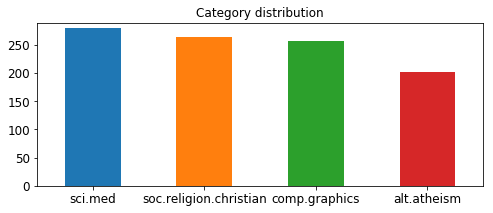

In [13]:
# Answer here
X_sample= X.sample(n=1000)
upper_bound = max(X_sample.category_name.value_counts()) + 10

print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

## Exercise 8
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.

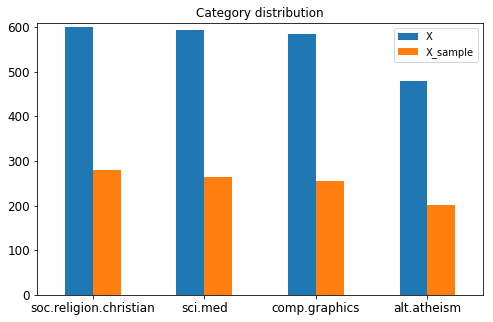

In [14]:
# Answer here

index=X.category_name.value_counts().index
X1 = X.category_name.value_counts().values
X2 = X_sample.category_name.value_counts().values

p = pd.DataFrame({'X':X1, 'X_sample':X2}, index=index)
upper_bound = max(X.category_name.value_counts()) + 10
p.plot(kind = 'bar', title = 'Category distribution', ylim = [0, upper_bound], rot = 0, fontsize = 12, figsize = (8,5))


## Exercise 9
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
analyze = count_vect.build_analyzer()
analyze(" ".join(list(X[0:1].text)))

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

## Exercise 10
We said that the 1 at the beginning of the fifth record represents the 00 term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [17]:
# Answer here
a = X_counts[4,0:100].toarray()
type(a)
b = np.where(a==1)
print(b)
count_vect.get_feature_names()[37]

(array([0, 0], dtype=int64), array([ 0, 37], dtype=int64))


'01'

## Exercise 11
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of 1 in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization.

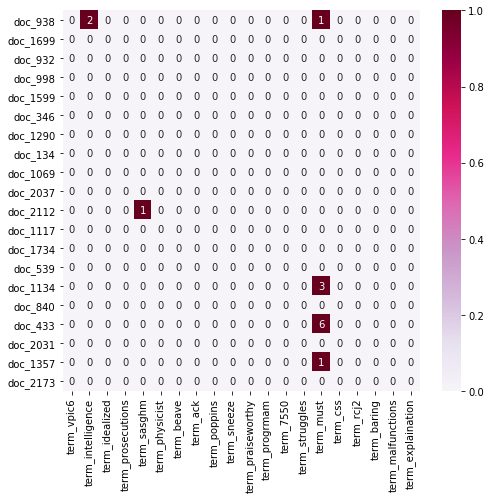

In [20]:
# Answer here
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

a=count_vect.get_feature_names()
x=np.random.choice(a,20)
# print(x)
ind_x=[]
for e in x :
    ind_x.append(a.index(e))

np.shape(ind_x)
plot_x = ["term_"+str(i) for i in x]
y=list(np.random.choice(list(X.index),20))

type(y)
plot_y = ["doc_"+ str(i) for i in y]
plot_x = ["term_"+str(i) for i in x]
plot_z = X_counts[y,:]
plot_z=plot_z[:,ind_x].toarray()


df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(8, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)


## Exercise 12
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

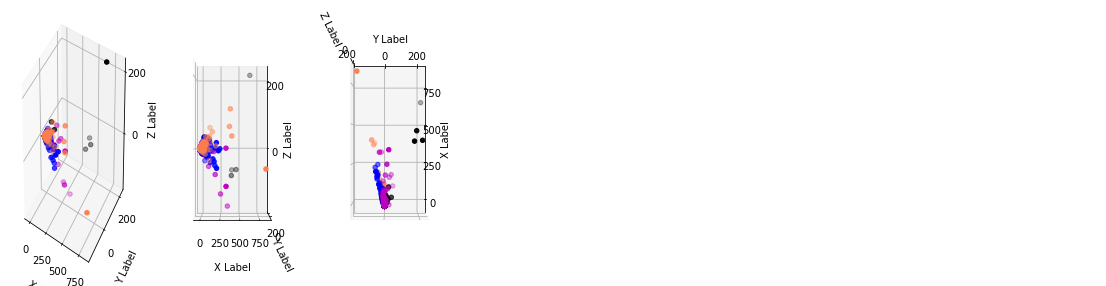

In [22]:
# Answer here
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
X_reduced.shape
categories

fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(1,3,1, projection='3d')
ax1 = fig.add_subplot(1,3,2, projection='3d')
ax2 = fig.add_subplot(1,3,3, projection='3d')



col = ['coral', 'blue', 'black', 'm']

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    

    ax.scatter(xs, ys, zs, c = c, s=20, marker='o')
    
    #X-Z
    ax1.scatter(xs, ys, zs, c = c, s=20, marker='o')
    ax1.view_init(0,-90)
    #X-Y
    ax2.scatter(xs, ys, zs, c = c, s=20, marker='o')
    ax2.view_init(-90,0)
    

ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

ax1.set_xlabel('\nX Label')
ax1.set_ylabel('\nY Label')
ax1.set_zlabel('\nZ Label')

ax2.set_xlabel('\nX Label')
ax2.set_ylabel('\nY Label')
ax2.set_zlabel('\nZ Label')

plt.show()

## Exercise 13
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this. Check last year's notebook for code on how to generate the interactive version of the plot above.

In [31]:
# Answer here
import plotly.plotly as py
from plotly import tools
import plotly.graph_objs as go
tools.set_credentials_file(username='m793281', api_key='9D8glxsygrkWdAJ54uc0')
import plotly.offline as of
of.offline.init_notebook_mode(connected=True)

term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

x11=count_vect.get_feature_names()
y11=term_frequencies

data = [go.Bar(x=x11, y=y11)]
py.iplot(data)

# import helpers.text_analysis as ta
# of.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies], "Term Frequency Distribution"))


The draw time for this plot will be slow for clients without much RAM.


C:\Users\ShanJu\Anaconda3\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Slow



## Exercise 14
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

In [26]:
# Answer here
import plotly.offline as of
of.offline.init_notebook_mode(connected=True)
from plotly import tools
import plotly.graph_objs as go
tools.set_credentials_file(username='m793281', api_key='wfQfcoS7wTbMKEELt5Ag')




x1=[count_vect.get_feature_names()[i] for i in range(10000)]
y1=[term_frequencies[i] for i in range(10000)]

data = [go.Bar(x=x1, y=y1)]
py.iplot(data)

## Exercise 15
Additionally, you can attempt to sort the terms on the x-axis by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called long tail (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

In [27]:
# Answer here
import matplotlib.pyplot as plt
import plotly.offline as of
of.offline.init_notebook_mode(connected=True)


list_a = [count_vect.get_feature_names()[i] for i in range(10000,10500)]
list_b = [term_frequencies[i] for i in range(10000,10500)]

mapping ={}
for key, value in zip(list_a,list_b):
    mapping[key] = value

K=[]
V=[]
for k, v in mapping.items():
    if v >10:
        K.append(k)
        V.append(v)

m_new ={}
for key, value in zip(K,V):
    m_new[key] = value        
        


new = sorted(m_new.items(), key=lambda d: d[1], reverse = True)
x1, y1 =zip(*new)

data = [go.Bar(x=x1, y=y1)]
py.iplot(data)


## Exercise 16
Try to generate the binarization using the category_name column instead. Does it work?

In [28]:
# Answer here
mlb.fit(X.category_name)
mlb.classes_
X['bin_category'] = mlb.transform(X['category']).tolist()
X[0:9]
# No. It dose not work.

NameError: name 'mlb' is not defined

Answer: No, it does not work.

# Part 2: New Dataset (Lab 1 operations)

In [130]:
import os
import pandas as pd
import numpy as np
import helpers.data_mining_helpers as helpp

categories = ['Sentence', 'Score']
cate = ['amazon', 'imdb', 'yelp']


root = os.path.abspath('.')
file_root = os.path.join(root, 'data')
file_names = os.listdir(file_root)
file_path = [ os.path.join(file_root,x) for x in file_names ]
print(file_path)

i=0
data_empty=pd.DataFrame(columns=['Sentence','Score','Source'])

for item in file_path :
         data_temp = pd.read_csv(item, sep = '\t', header = None, names = categories)
         source_data = pd.DataFrame({'Source':[file_names[i][:-13]]*data_temp.shape[0]})    
         new=pd.concat([data_temp,source_data],axis=1)
         data_empty=data_empty.append(new)
         i=i+1
raw=data_empty


['C:\\Users\\ShanJu\\Documents\\mine_python_practice\\dm_2018_hw_1-master\\data\\amazon_labelled.txt', 'C:\\Users\\ShanJu\\Documents\\mine_python_practice\\dm_2018_hw_1-master\\data\\imdb_labelled.txt', 'C:\\Users\\ShanJu\\Documents\\mine_python_practice\\dm_2018_hw_1-master\\data\\yelp_labelled.txt']


In [131]:
raw[0:10]

,Sentence,Score,Source
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon
5,I have to jiggle the plug to get it to line up...,0,amazon
6,If you have several dozen or several hundred c...,0,amazon
7,If you are Razr owner...you must have this!,1,amazon
8,"Needless to say, I wasted my money.",0,amazon
9,What a waste of money and time!.,0,amazon


In [132]:
len(raw)

2748

In [133]:
X = pd.DataFrame(raw, columns = ['Sentence', 'Score'])

In [134]:
X[0:2]

,Sentence,Score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1


In [135]:
X = pd.DataFrame(raw)
X[0:10][["Sentence","Source"]]

,Sentence,Source
0,So there is no way for me to plug it in here i...,amazon
1,"Good case, Excellent value.",amazon
2,Great for the jawbone.,amazon
3,Tied to charger for conversations lasting more...,amazon
4,The mic is great.,amazon
5,I have to jiggle the plug to get it to line up...,amazon
6,If you have several dozen or several hundred c...,amazon
7,If you are Razr owner...you must have this!,amazon
8,"Needless to say, I wasted my money.",amazon
9,What a waste of money and time!.,amazon


In [136]:
# Query the last 10 records
X[-10:]

,Sentence,Score,Source
990,The refried beans that came with my meal were ...,0,yelp
991,Spend your money and time some place else.,0,yelp
992,A lady at the table next to us found a live gr...,0,yelp
993,the presentation of the food was awful.,0,yelp
994,I can't tell you how disappointed I was.,0,yelp
995,I think food should have flavor and texture an...,0,yelp
996,Appetite instantly gone.,0,yelp
997,Overall I was not impressed and would not go b...,0,yelp
998,"The whole experience was underwhelming, and I ...",0,yelp
999,"Then, as if I hadn't wasted enough of my life ...",0,yelp


In [137]:
len(X)

2748

In [138]:
# using iloc (by position)
X.iloc[::10,0:2][0:10]

,Sentence,Score
0,So there is no way for me to plug it in here i...,0
10,And the sound quality is great.,1
20,I went on Motorola's website and followed all ...,0
30,"This is a simple little phone to use, but the ...",0
40,"It has a great camera thats 2MP, and the pics ...",1
50,Not loud enough and doesn't turn on like it sh...,0
60,Essentially you can forget Microsoft's tech su...,0
70,Mic Doesn't work.,0
80,I wear it everyday and it holds up very well.,1
90,For a product that costs as much as this one d...,0


In [139]:
# using loc (by label)
X.loc[::10, 'Sentence'][0:10]

0     So there is no way for me to plug it in here i...
10                      And the sound quality is great.
20    I went on Motorola's website and followed all ...
30    This is a simple little phone to use, but the ...
40    It has a great camera thats 2MP, and the pics ...
50    Not loud enough and doesn't turn on like it sh...
60    Essentially you can forget Microsoft's tech su...
70                                    Mic Doesn't work.
80        I wear it everyday and it holds up very well.
90    For a product that costs as much as this one d...
Name: Sentence, dtype: object

In [140]:
X[::10][0:10]

,Sentence,Score,Source
0,So there is no way for me to plug it in here i...,0,amazon
10,And the sound quality is great.,1,amazon
20,I went on Motorola's website and followed all ...,0,amazon
30,"This is a simple little phone to use, but the ...",0,amazon
40,"It has a great camera thats 2MP, and the pics ...",1,amazon
50,Not loud enough and doesn't turn on like it sh...,0,amazon
60,Essentially you can forget Microsoft's tech su...,0,amazon
70,Mic Doesn't work.,0,amazon
80,I wear it everyday and it holds up very well.,1,amazon
90,For a product that costs as much as this one d...,0,amazon


In [141]:
X[0:10]

,Sentence,Score,Source
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon
5,I have to jiggle the plug to get it to line up...,0,amazon
6,If you have several dozen or several hundred c...,0,amazon
7,If you are Razr owner...you must have this!,1,amazon
8,"Needless to say, I wasted my money.",0,amazon
9,What a waste of money and time!.,0,amazon


In [142]:
#Try to fecth records belonging to the yelp category, and query every 10th record. Only show the first 5 records.
X.loc[lambda f: f.Source == 'yelp'].iloc[::10, :][0:5]

,Sentence,Score,Source
0,Wow... Loved this place.,1,yelp
10,Service was very prompt.,1,yelp
20,The Burrittos Blah!,0,yelp
30,"Also there are combos like a burger, fries, an...",1,yelp
40,The shrimp tender and moist.,1,yelp


In [143]:
# Missing values
X.isnull()

,Sentence,Score,Source
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [144]:
X.isnull().apply(lambda x: helpp.check_missing_values(x))

Sentence    (The amoung of missing records is: , 0)
Score       (The amoung of missing records is: , 0)
Source      (The amoung of missing records is: , 0)
dtype: object

In [145]:
X.isnull().apply(lambda x: helpp.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
5      (The amoung of missing records is: , 0)
6      (The amoung of missing records is: , 0)
7      (The amoung of missing records is: , 0)
8      (The amoung of missing records is: , 0)
9      (The amoung of missing records is: , 0)
10     (The amoung of missing records is: , 0)
11     (The amoung of missing records is: , 0)
12     (The amoung of missing records is: , 0)
13     (The amoung of missing records is: , 0)
14     (The amoung of missing records is: , 0)
15     (The amoung of missing records is: , 0)
16     (The amoung of missing records is: , 0)
17     (The amoung of missing records is: , 0)
18     (The amoung of missing records is: , 0)
19     (The amoung of missing records is: , 0)
20     (The amoung of missing records is: , 0)
21     (The a

In [146]:
dummy_series = pd.Series(["dummy_record", 1], index=["Sentence", "Score"])

In [147]:
dummy_series

Sentence    dummy_record
Score                  1
dtype: object

In [148]:
result_with_series = X.append(dummy_series, ignore_index=True)

In [149]:
# check if the records was commited into result # original 2748
len(result_with_series)

2749

In [150]:
result_with_series.isnull().apply(lambda x: helpp.check_missing_values(x))

Sentence    (The amoung of missing records is: , 0)
Score       (The amoung of missing records is: , 0)
Source      (The amoung of missing records is: , 1)
dtype: object

In [151]:
# dummy record as dictionary format
dummy_dict = [{'Sentence': 'dummy_record',
               'Score': 1
              }]

In [152]:
X = X.append(dummy_dict, ignore_index=True)

C:\Users\ShanJu\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



In [153]:
len(X)

2749

In [154]:
X.isnull().apply(lambda x: helpp.check_missing_values(x))

Sentence    (The amoung of missing records is: , 0)
Score       (The amoung of missing records is: , 0)
Source      (The amoung of missing records is: , 1)
dtype: object

In [155]:
X.dropna(inplace=True)

In [156]:
X.isnull().apply(lambda x: helpp.check_missing_values(x))

Sentence    (The amoung of missing records is: , 0)
Score       (The amoung of missing records is: , 0)
Source      (The amoung of missing records is: , 0)
dtype: object

In [157]:
len(X)

2748

In [158]:
# 4.2 Dealing with Duplicate Date
X.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2718    False
2719    False
2720    False
2721    False
2722    False
2723    False
2724    False
2725    False
2726    False
2727    False
2728    False
2729    False
2730    False
2731    False
2732    False
2733    False
2734    False
2735    False
2736    False
2737    False
2738    False
2739    False
2740    False
2741    False
2742    False
2743    False
2744    False
2745    False
2746    False
2747    False
Length: 2748, dtype: bool

In [159]:
sum(X.duplicated())

17

In [160]:
X.drop_duplicates(keep='first', inplace=True) # inplace applies changes directly on our dataframe

In [161]:
len(X)

2731

In [162]:
# 5. Data Preprocessing
X_sample = X.sample(n=1000) #random state

In [163]:
len(X_sample)

1000

In [164]:
X_sample[0:6]

,Sentence,Score,Source
1132,There were too many close ups.,0,imdb
475,Very easy to use.,1,amazon
1964,Soggy and not good.,0,yelp
1923,Perhaps I caught them on an off night judging ...,0,yelp
159,W810i is just SUPERB.,1,amazon
2009,"I have been in more than a few bars in Vegas, ...",0,yelp


In [165]:
import matplotlib.pyplot as plt
%matplotlib inline

In [166]:
categories

['Sentence', 'Score']

yelp      996
amazon    990
imdb      745
Name: Source, dtype: int64


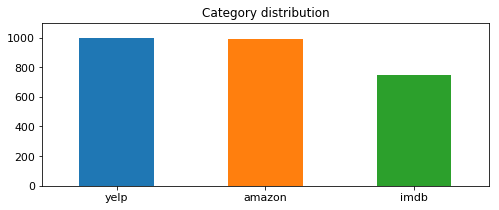

In [167]:
print(X.Source.value_counts())

# plot barchart for X_sample
X.Source.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 1100],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

amazon    377
yelp      366
imdb      257
Name: Source, dtype: int64
['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


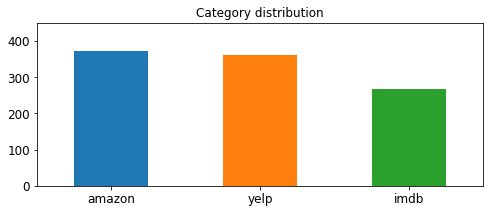

In [168]:
print(X_sample.Source.value_counts())

# plot barchart for X_sample
X_sample= X.sample(n=1000)
X_sample.Source.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 450], 
                                           rot = 0, fontsize = 12, figsize = (8,3))
print(plt.style.available)

amazon    372
yelp      362
imdb      266
Name: Source, dtype: int64


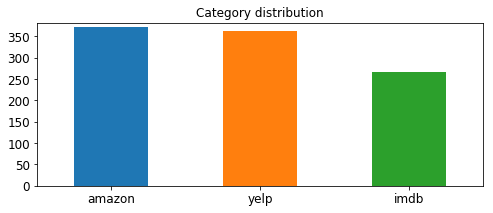

In [169]:
# Answer here
upper_bound = max(X_sample.Source.value_counts()) + 10

print(X_sample.Source.value_counts())

# plot barchart for X_sample
X_sample.Source.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

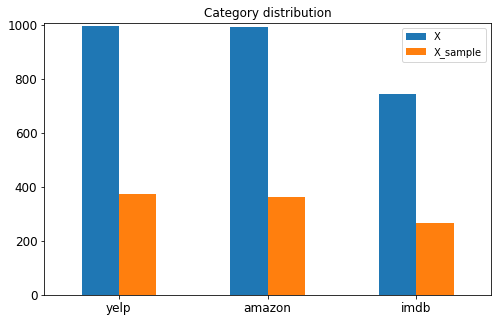

In [170]:
# Answer here

index=X.Source.value_counts().index
X1 = X.Source.value_counts().values
X2 = X_sample.Source.value_counts().values

p = pd.DataFrame({'X':X1, 'X_sample':X2}, index=index)
upper_bound = max(X.Source.value_counts()) + 10
p.plot(kind = 'bar', title = 'Category distribution', ylim = [0, upper_bound], rot = 0, fontsize = 12, figsize = (8,5))

In [171]:
# 5.2 Feature Creation
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ShanJu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [172]:
# takes a like a minute or two to process
X['unigrams'] = X['Sentence'].apply(lambda x: helpp.tokenize_text(x))

In [173]:
X[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [174]:
X[0:4]

,Sentence,Score,Source,unigrams
0,So there is no way for me to plug it in here i...,0,amazon,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,amazon,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,amazon,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,amazon,"[Tied, to, charger, for, conversations, lastin..."


In [175]:
list(X[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

In [176]:
# 5.3 Feature subset selection
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.Sentence)

In [177]:
X_counts

<2731x5155 sparse matrix of type '<class 'numpy.int64'>'
	with 30212 stored elements in Compressed Sparse Row format>

In [178]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")
#" ".join(list(X[4:5].text))

['hello', 'world']

In [179]:
analyze(" ".join(list(X[0:1].Sentence)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [180]:
X_counts.shape

(2731, 5155)

In [181]:
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [182]:
X[0:5]

,Sentence,Score,Source,unigrams
0,So there is no way for me to plug it in here i...,0,amazon,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,amazon,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,amazon,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,amazon,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,amazon,"[The, mic, is, great, .]"


In [183]:
X_counts[0:4, 0:150].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [184]:
a = X_counts[4,0:3000].toarray()
type(a)
b = np.where(a==1)
print(b)
type(b)
count_vect.get_feature_names()[2023]

(array([0, 0, 0], dtype=int64), array([2023, 2427, 2868], dtype=int64))


'great'

In [185]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [186]:
count_vect.transform(['00 Something completely new.']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [187]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [188]:
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980']

In [189]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [190]:
plot_z = X_counts[0:20, 0:20].toarray()

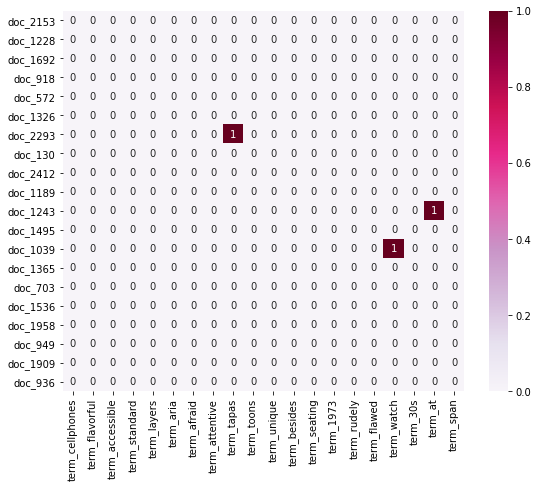

In [237]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

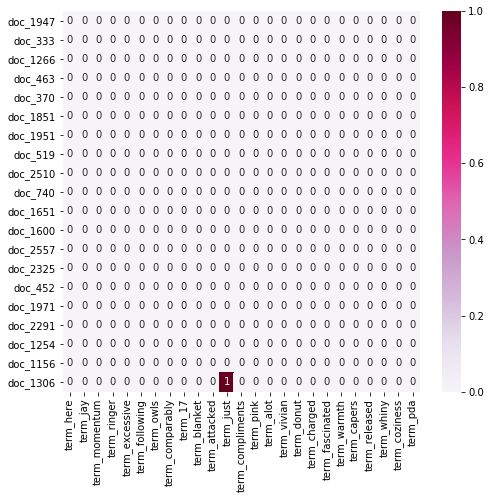

In [245]:
# Answer here
a=count_vect.get_feature_names()
x=np.random.choice(a,25)
# print(x)
ind_x=[]
for e in x :
    ind_x.append(a.index(e))

np.shape(ind_x)
plot_x = ["term_"+str(i) for i in x]
y=list(np.random.choice(list(X.index),20))

type(y)
plot_y = ["doc_"+ str(i) for i in y]
plot_x = ["term_"+str(i) for i in x]
plot_z = X_counts[y,:]
plot_z=plot_z[:,ind_x].toarray()


df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(8, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)


In [239]:
# 5.4 Dimensionality Reduction
from sklearn.decomposition import PCA

In [194]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

In [195]:
X_reduced.shape

(2731, 2)

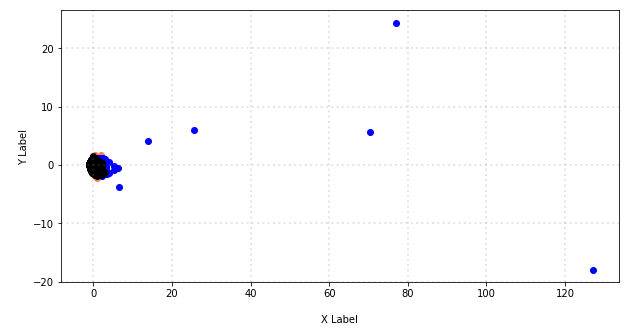

In [196]:
import matplotlib.pyplot as plt
col = ['coral', 'blue', 'black']

# plot
fig = plt.figure(figsize = (10,5))
ax = fig.subplots()

for c, category in zip(col, cate):
    xs = X_reduced[X['Source'] == category].T[0]
    ys = X_reduced[X['Source'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

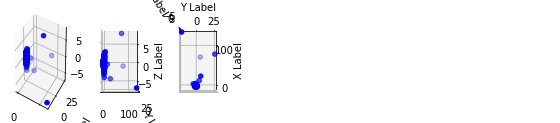

In [197]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
X_reduced.shape
categories

fig = plt.figure(figsize = (4,2))
ax = fig.add_subplot(1,3,1, projection='3d')
ax1 = fig.add_subplot(1,3,2, projection='3d')
ax2 = fig.add_subplot(1,3,3, projection='3d')



col = ['coral', 'blue', 'black']

for c, category in zip(col, cate):
    xs = X_reduced[X['Source'] == category].T[0]
    ys = X_reduced[X['Source'] == category].T[1]
    zs = X_reduced[X['Source'] == category].T[2]
    

    ax.scatter(xs, ys, zs, c = c, s=20, marker='o')
    
    #X-Z
    ax1.scatter(xs, ys, zs, c = c, s=20, marker='o')
    ax1.view_init(0,-90)
    #X-Y
    ax2.scatter(xs, ys, zs, c = c, s=20, marker='o')
    ax2.view_init(-90,0)
    

ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

ax1.set_xlabel('\nX Label')
ax1.set_ylabel('\nY Label')
ax1.set_zlabel('\nZ Label')

ax2.set_xlabel('\nX Label')
ax2.set_ylabel('\nY Label')
ax2.set_zlabel('\nZ Label')

plt.show()

In [198]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [199]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [200]:
term_frequencies[0]

1

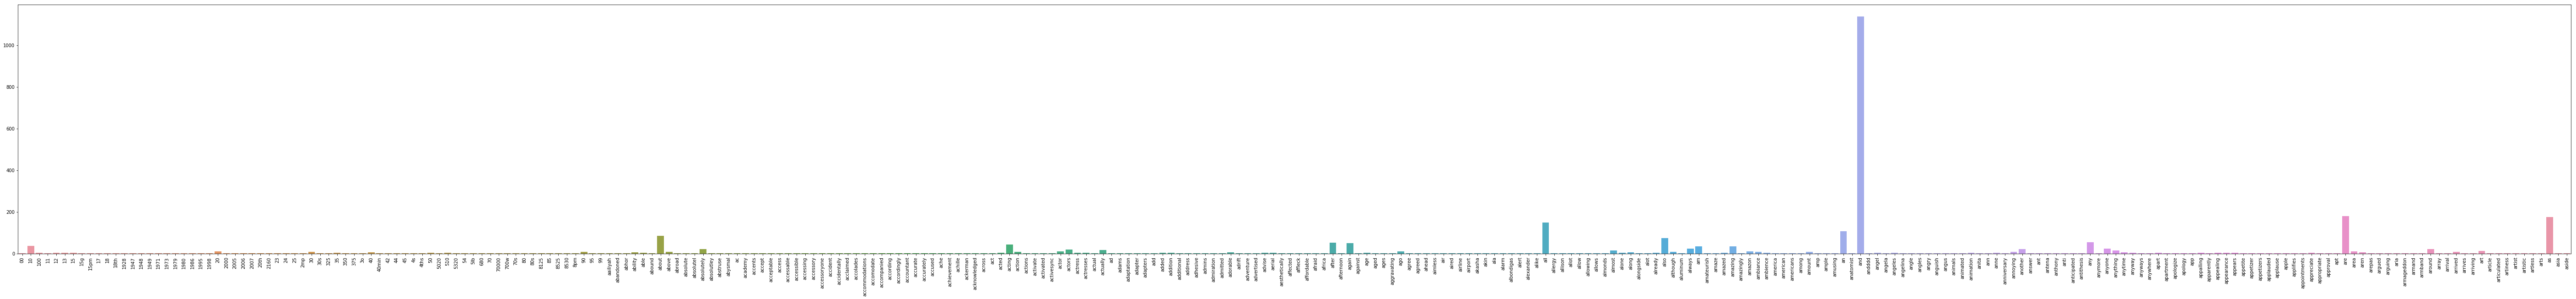

In [201]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

C:\Users\ShanJu\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




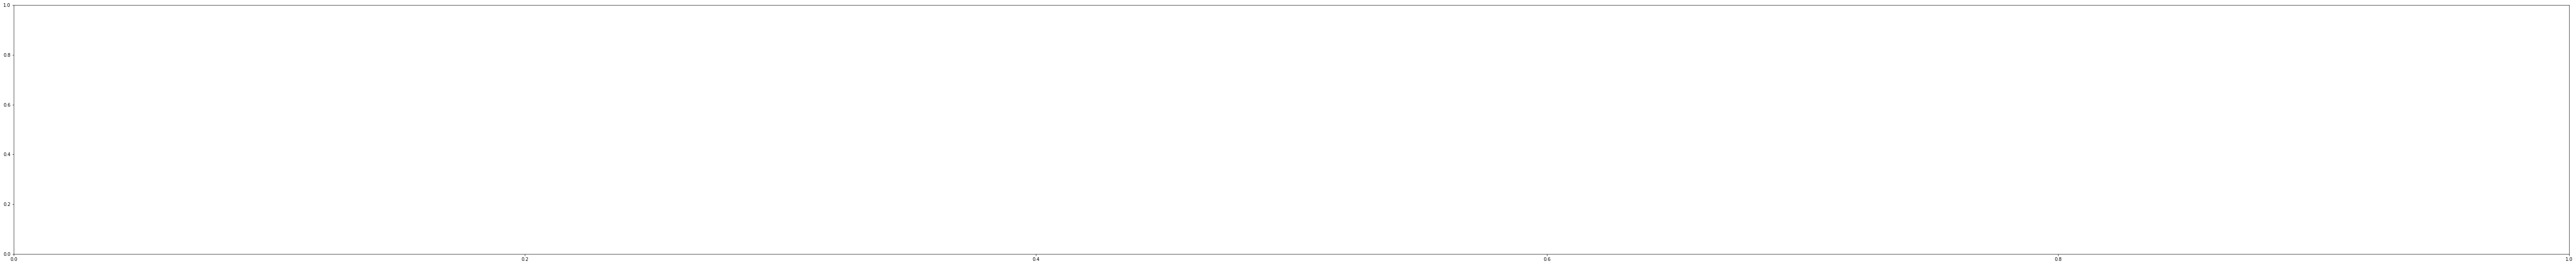

In [202]:
# Answer here
import plotly.plotly as py
from plotly import tools
import plotly.graph_objs as go
tools.set_credentials_file(username='m793281', api_key='9D8glxsygrkWdAJ54uc0')
import plotly.offline as of
of.offline.init_notebook_mode(connected=True)
import helpers.text_analysis as ta



plt.subplots(figsize=(100, 10))
of.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies], "Term Frequency Distribution"))


In [203]:
# Answer here
import plotly.offline as of
of.offline.init_notebook_mode(connected=True)
from plotly import tools
import plotly.graph_objs as go
tools.set_credentials_file(username='m793281', api_key='9D8glxsygrkWdAJ54uc0')
import helpers.text_analysis as ta

x1=[count_vect.get_feature_names()[i] for i in range(500)]
y1=[term_frequencies[i] for i in range(500)]

data = [go.Bar(x=x1, y=y1)]
py.iplot(data)
#of.iplot(ta.plot_word_frequency([count_vect.get_feature_names()[0:10000], term_frequencies[0:10000]], "Term Frequency Distribution"))

In [204]:
import matplotlib.pyplot as plt
import plotly.offline as of
of.offline.init_notebook_mode(connected=True)

list_a = [count_vect.get_feature_names()[i] for i in range(500)]
list_b = [term_frequencies[i] for i in range(500)]

mapping ={}
for key, value in zip(list_a,list_b):
    mapping[key] = value

K=[]
V=[]
for k, v in mapping.items():
    if v >10:
        K.append(k)
        V.append(v)

        
m_new ={}
for key, value in zip(K,V):
    m_new[key] = value

new = sorted(mapping.items(), key=lambda d: d[1], reverse = True)
x1, y1 =zip(*new)

data = [go.Bar(x=x1, y=y1)]
py.iplot(data)

In [205]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

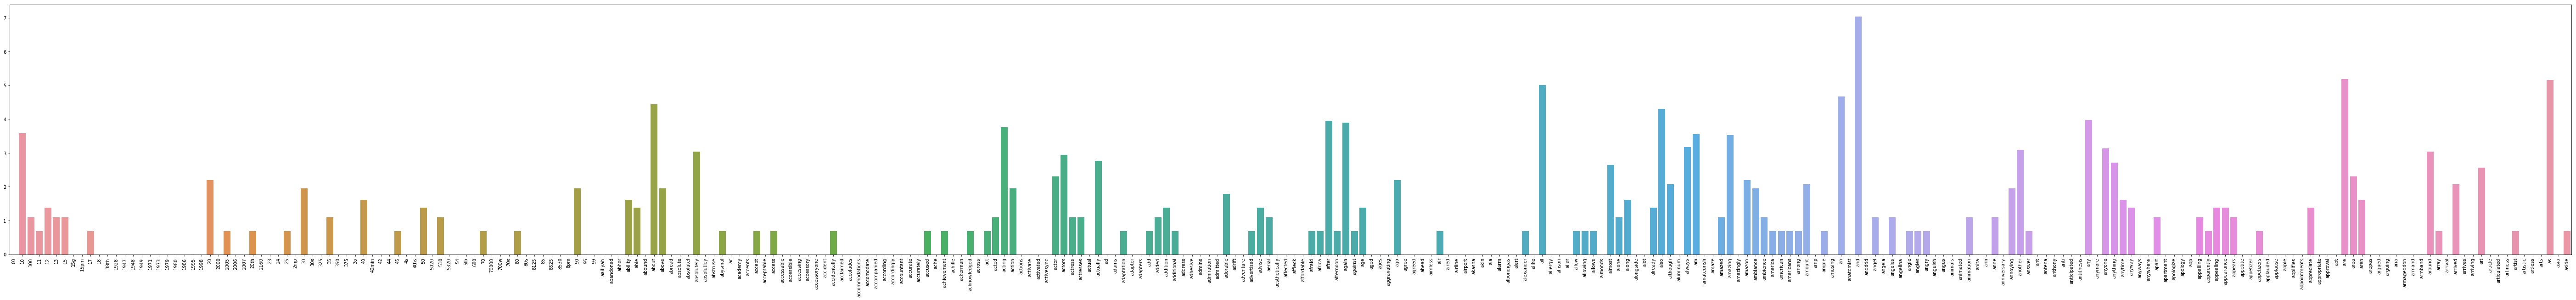

In [206]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [207]:
#5.6 Discretization and Binarization
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [208]:
mlb = preprocessing.LabelBinarizer()

In [209]:
mlb.fit(X.Source)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [210]:
mlb.classes_

array(['amazon', 'imdb', 'yelp'], dtype='<U6')

In [211]:
X['bin_category'] = mlb.transform(X['Source']).tolist()

In [212]:
X_S = X.sample(n=30)
X_S[0:9]

,Sentence,Score,Source,unigrams,bin_category
2632,On three different occasions I asked for well ...,0,yelp,"[On, three, different, occasions, I, asked, fo...","[0, 0, 1]"
435,Warning - Stay away.,0,amazon,"[Warning, -, Stay, away, .]","[1, 0, 0]"
1762,I was disgusted because I was pretty sure that...,0,yelp,"[I, was, disgusted, because, I, was, pretty, s...","[0, 0, 1]"
1963,Waitress was good though!,1,yelp,"[Waitress, was, good, though, !]","[0, 0, 1]"
106,That's a huge design flaw (unless I'm not usin...,0,amazon,"[That, 's, a, huge, design, flaw, (, unless, I...","[1, 0, 0]"
691,Clear crisp sound.,1,amazon,"[Clear, crisp, sound, .]","[1, 0, 0]"
2729,We started with the tuna sashimi which was bro...,0,yelp,"[We, started, with, the, tuna, sashimi, which,...","[0, 0, 1]"
525,REALLY UGLY.,0,amazon,"[REALLY, UGLY, .]","[1, 0, 0]"
2688,It was equally awful.,0,yelp,"[It, was, equally, awful, .]","[0, 0, 1]"


# Part 3: New dataset & Your new operations

## New Data Visualizations
Generating a square wordcloud from the "amazon_labelled.txt" which is one of new datasets.

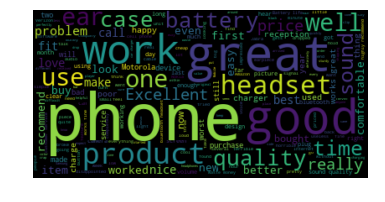

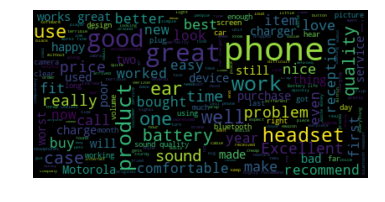

In [213]:
import os
from os import path
from wordcloud import WordCloud

root = os.path.abspath('.')
file_root = os.path.join(root, 'data')
text = open(path.join(file_root, 'amazon_labelled.txt')).read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display a word cloud image in the matplotlib way
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Lower max_font_sizw 
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

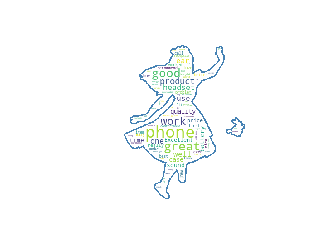

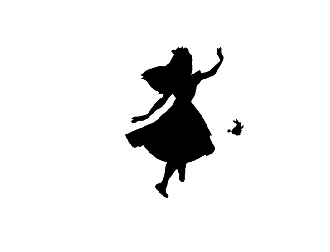

In [214]:
# from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

root = os.path.abspath('.')
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
alice_mask = np.array(Image.open(path.join(d, "alice_mask.png")))

# stopwords = set(STOPWORDS)
# stopwords.add("get")

wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
               contour_width=3, contour_color='steelblue')

wc.generate(text)

# store to file
wc.to_file(path.join(d, "alice_result.png"))

# show
plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray)
plt.axis("off")
plt.show()

## TF-IDF

In [215]:
sentence = list(X['Sentence'])
sentence[0:5]

['So there is no way for me to plug it in here in the US unless I go by a converter.',
 'Good case, Excellent value.',
 'Great for the jawbone.',
 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!',
 'The mic is great.']

In [216]:
from sklearn.feature_extraction.text import CountVectorizer

In [217]:
vectorizer = CountVectorizer()

In [218]:
XX = vectorizer.fit_transform(sentence)

In [219]:
word = vectorizer.get_feature_names()

In [220]:
print(XX.toarray)

<bound method _cs_matrix.toarray of <2731x5155 sparse matrix of type '<class 'numpy.int64'>'
	with 30212 stored elements in Compressed Sparse Row format>>


In [221]:
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np

In [222]:
transformer = TfidfTransformer()  

In [223]:
tfidf = transformer.fit_transform(XX) 

In [224]:
weight = tfidf.toarray()

In [225]:
for i in range(5):
    print("-----Here we show ",i, "document and terms with tf-idf weight-----")
    for j in range(50):
        print(word[j],weight[i][j])

-----Here we show  0 document and terms with tf-idf weight-----
00 0.0
10 0.0
100 0.0
11 0.0
12 0.0
13 0.0
15 0.0
15g 0.0
15pm 0.0
17 0.0
18 0.0
18th 0.0
1928 0.0
1947 0.0
1948 0.0
1949 0.0
1971 0.0
1973 0.0
1979 0.0
1980 0.0
1986 0.0
1995 0.0
1998 0.0
20 0.0
2000 0.0
2005 0.0
2006 0.0
2007 0.0
20th 0.0
2160 0.0
23 0.0
24 0.0
25 0.0
2mp 0.0
30 0.0
30s 0.0
325 0.0
35 0.0
350 0.0
375 0.0
3o 0.0
40 0.0
40min 0.0
42 0.0
44 0.0
45 0.0
4s 0.0
4ths 0.0
50 0.0
5020 0.0
-----Here we show  1 document and terms with tf-idf weight-----
00 0.0
10 0.0
100 0.0
11 0.0
12 0.0
13 0.0
15 0.0
15g 0.0
15pm 0.0
17 0.0
18 0.0
18th 0.0
1928 0.0
1947 0.0
1948 0.0
1949 0.0
1971 0.0
1973 0.0
1979 0.0
1980 0.0
1986 0.0
1995 0.0
1998 0.0
20 0.0
2000 0.0
2005 0.0
2006 0.0
2007 0.0
20th 0.0
2160 0.0
23 0.0
24 0.0
25 0.0
2mp 0.0
30 0.0
30s 0.0
325 0.0
35 0.0
350 0.0
375 0.0
3o 0.0
40 0.0
40min 0.0
42 0.0
44 0.0
45 0.0
4s 0.0
4ths 0.0
50 0.0
5020 0.0
-----Here we show  2 document and terms with tf-idf weight-----
00 0

# Compute the similarity between random sentences
## (1) Cosine Similarity

In [226]:
# Here we use TF-IDF Vectorizer and transform our documents into the TF-IDF matrix.
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sentence)
print(tfidf_matrix.shape)


(2731, 5155)


In [227]:
#Calculate the Cosine Similarity between the first document with each of the other documents of the set.
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(tfidf_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
np.shape(similarity_matrix)

(2731, 2731)

In [228]:
# Cosine similarity between the first document with all the document in the set.

cosine_similarity(tfidf[0:1],tfidf)

array([[1.        , 0.        , 0.07251216, ..., 0.0796    , 0.07643537,
        0.14306094]])

Note that the first value of the array is 1.0 because it is the Cosine Similarity between the first document with itself.

## (2) Euclidean Distance

In [229]:
from sklearn.metrics.pairwise import euclidean_distances as ed
import random

rnd = round(random.random()*2713) # random choice a document
features = vectorizer.fit_transform(sentence).todense()

ee=[]
for i in features:
    ee.append(ed(features[rnd],i))
ee = np.array(ee)
related_ind = ee.flatten().argsort()[:6]
#take the former sixth Euclidean Distance similarity
ee[related_ind]

array([[[0.        ]],

       [[5.47722558]],

       [[5.56776436]],

       [[5.65685425]],

       [[5.65685425]],

       [[5.65685425]]])

The smaller the value is, the more identical bwtween two sentences.

# Naive Bayes classifier

In [230]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.Sentence)
X_counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [231]:
# Preparing for training
from sklearn.model_selection import train_test_split
A = X.Sentence
B = X.Score
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2)

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features=1000, binary=True)
A_train_vect = vect.fit_transform(A_train)

In [232]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
A_train_res, B_train_res = sm.fit_sample(A_train_vect, B_train)

C:\Users\ShanJu\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:93: UserWarning:

'y' should be of types ('binary', 'multiclass', 'multilabel-indicator') only. Got unknown instead.



In [233]:
unique, counts = np.unique(B_train_res, return_counts=True)
print(list(zip(unique, counts)))

[(0, 1098), (1, 1098)]


The classes are now balanced for the train set. We can move onto training a Naive Bayes model.

In [234]:
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import scipy.sparse

np.shape(A_train_res)
B_train_res = B_train_res.astype('int')

nb = MultinomialNB()
nb.fit(A_train_res, B_train_res)
nb.score(A_train_res, B_train_res)

0.8784153005464481

In [235]:
A_test_vect = vect.transform(A_test)
B_pred = nb.predict(A_test_vect)
B_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,

In [236]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
B_pred = B_pred.astype('int')
B_test = B_test.astype('int')
print("Accuracy: {:.2f}%".format(accuracy_score(B_test, B_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(B_test, B_pred) * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(B_test, B_pred))


Accuracy: 81.17%

F1 Score: 81.57

COnfusion Matrix:
 [[216  53]
 [ 50 228]]
